In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats

In [83]:
file_path = r'D:\Stations_data\Stations_data\Bani\all_months_copy'
os.chdir(file_path)

In [84]:
df1 = pd.read_csv('till_january.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [85]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [86]:
df3 = pd.read_csv('Temp_Rain_Bani.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
df3_1hr.tail()

,Temp (0C),Rainfall (mm)
Date & Time,,
2021-01-31 19:00:00,10.535,0.0
2021-01-31 20:00:00,9.720,0.0
2021-01-31 21:00:00,9.025,0.0
2021-01-31 22:00:00,7.905,0.0
2021-01-31 23:00:00,7.485,0.0


In [115]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-13') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-13') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-13') & (df3_1hr.index < '2020-04-17')

# Monsoon
date_mask1 = (df1_1hr.index >= '2020-07-01') & (df1_1hr.index < '2020-07-07')
date_mask2 = (df2_1hr.index >= '2020-07-01') & (df2_1hr.index < '2020-07-07')
date_mask3 = (df3_1hr.index >= '2020-07-01') & (df3_1hr.index < '2020-07-07')

# # Post-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-10-08') & (df1_1hr.index < '2020-10-14')
# date_mask2 = (df2_1hr.index >= '2020-10-08') & (df2_1hr.index < '2020-10-14')
# date_mask3 = (df3_1hr.index >= '2020-10-08') & (df3_1hr.index < '2020-10-14')

# # Winter
# date_mask1 = (df1_1hr.index >= '2020-12-20') & (df1_1hr.index < '2020-12-26')
# date_mask2 = (df2_1hr.index >= '2020-12-20') & (df2_1hr.index < '2020-12-26')
# date_mask3 = (df3_1hr.index >= '2020-12-20') & (df3_1hr.index < '2020-12-26')

In [116]:

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

In [117]:
type(SM_sensor1)

pandas.core.series.Series

In [118]:
work_df = pd.concat([SM_sensor1, SM_sensor2, SM_sensor3, SM_sensor4, SM_sensor5, SM_sensor6, SM_sensor7,
                     SM_sensor8, SM_sensor9, SM_sensor10, ST_sensor1, ST_sensor2, ST_sensor3, ST_sensor4,
                    ST_sensor5, ST_sensor6, ST_sensor7, ST_sensor8, ST_sensor9, ST_sensor10, Rainfall, Air_Temp], axis = 1)
work_df.tail()

,S1SM,S2SM,S3SM,S4SM,S5SM,S6SM,S7SM,S8SM,S9SM,S10SM,...,S3Temp,S4Temp,S5Temp,S6Temp,S7Temp,S8Temp,S9Temp,S10Temp,Int_Rainfall (mm),Temp (0C)
date,,,,,,,,,,,,,,,,,,,,,
2020-07-06 19:00:00,11.341667,12.700000,8.02,4.81,NaN,NaN,NaN,NaN,NaN,NaN,...,30.582167,29.996000,NaN,NaN,NaN,NaN,NaN,NaN,0.2,26.3800
2020-07-06 20:00:00,11.353333,13.010000,8.02,4.81,NaN,NaN,NaN,NaN,NaN,NaN,...,30.544333,29.979167,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.5275
2020-07-06 21:00:00,11.298333,13.300000,8.02,4.81,NaN,NaN,NaN,NaN,NaN,NaN,...,30.537833,29.986833,NaN,NaN,NaN,NaN,NaN,NaN,0.2,26.6825
2020-07-06 22:00:00,11.218333,13.533333,8.02,4.81,NaN,NaN,NaN,NaN,NaN,NaN,...,30.508000,29.974000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.5300
2020-07-06 23:00:00,11.140000,13.716667,8.02,4.81,NaN,NaN,NaN,NaN,NaN,NaN,...,30.493500,29.976333,NaN,NaN,NaN,NaN,NaN,NaN,0.2,26.5525


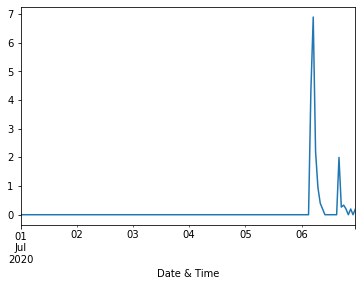

In [119]:
Rainfall.plot();

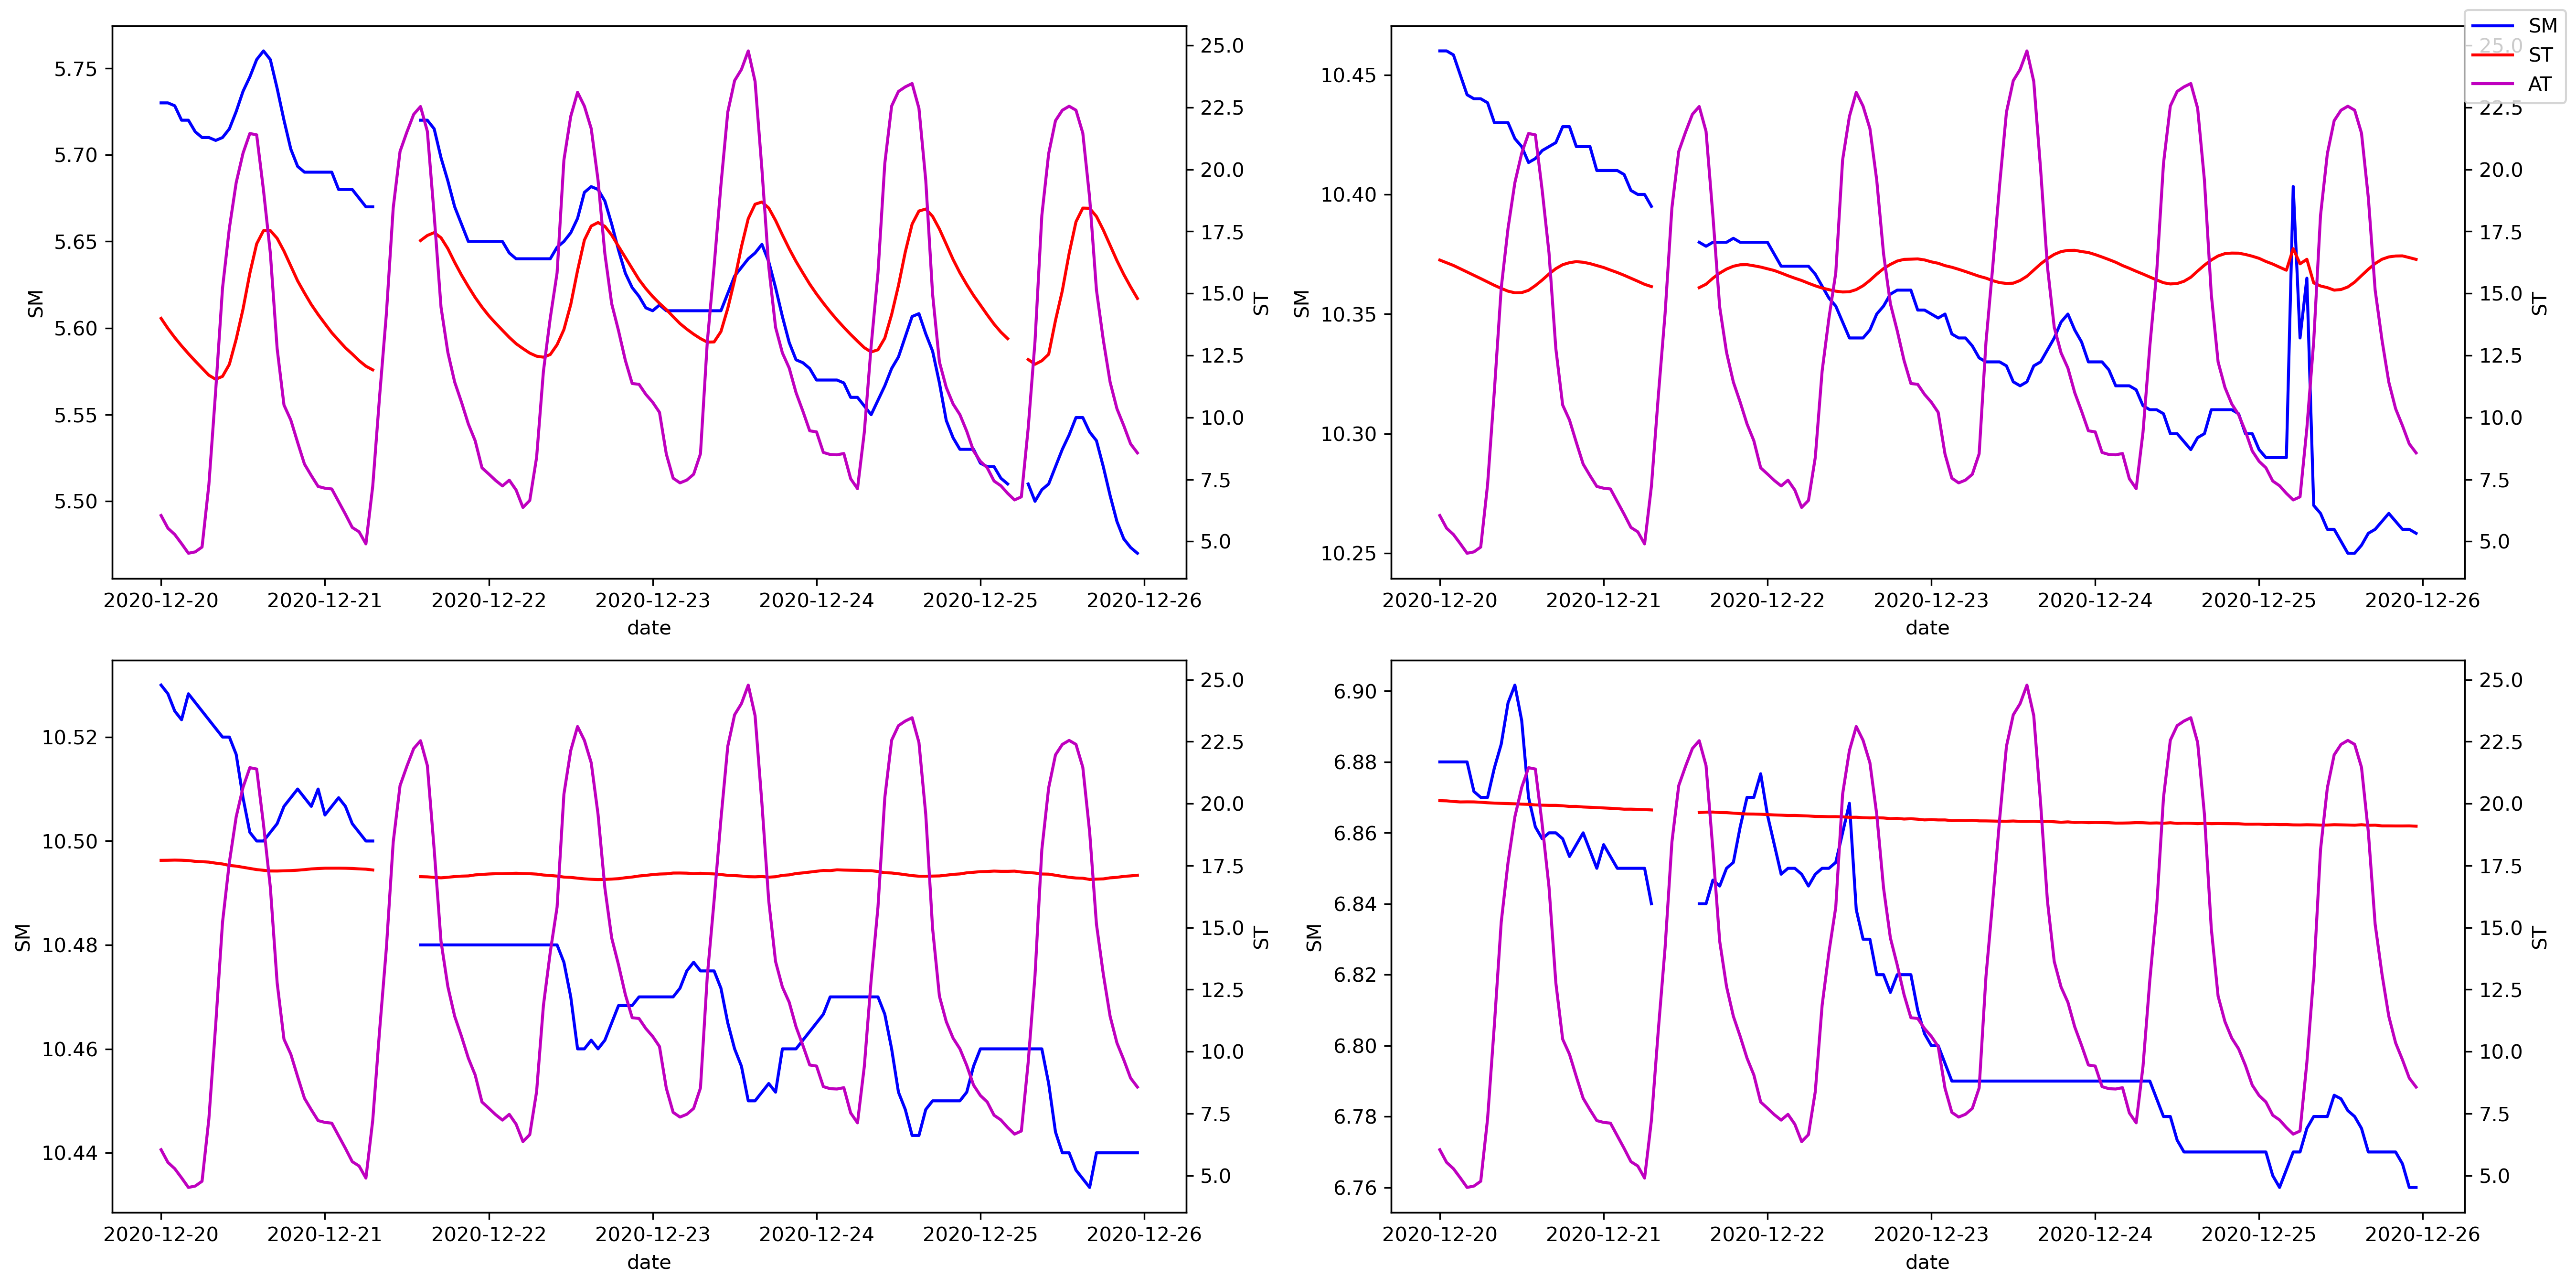

In [91]:
fg, ax = plt.subplots(2, 2, figsize=(9*2, 4*2.25), dpi=300)
ac1 = ax[0,0].twinx()
ax[0,0].plot(work_df.index, work_df.S1SM,'b' , label = 'SM')
ax[0,0].set(xlabel = 'date', ylabel = 'SM')
ac1.set(xlabel = 'date', ylabel = 'ST')
ac1.plot(work_df.index, work_df.S1Temp,'r' , label = 'ST')
ac1.plot(work_df.index, work_df['Temp (0C)'],'m' , label = 'AT')

ac2 = ax[0,1].twinx()
ax[0,1].plot(work_df.index, work_df.S2SM,'b')
ax[0,1].set(xlabel = 'date', ylabel = 'SM')
ac2.set(xlabel = 'date', ylabel = 'ST')
ac2.plot(work_df.index, work_df.S2Temp,'r' )
ac2.plot(work_df.index, work_df['Temp (0C)'],'m')

ac3 = ax[1,0].twinx()
ax[1,0].plot(work_df.index, work_df.S3SM,'b')
ax[1,0].set(xlabel = 'date', ylabel = 'SM')
ac3.set(xlabel = 'date', ylabel = 'ST')
ac3.plot(work_df.index, work_df.S3Temp,'r')
ac3.plot(work_df.index, work_df['Temp (0C)'],'m')

ac4 = ax[1,1].twinx()
ax[1,1].plot(work_df.index, work_df.S4SM,'b')
ax[1,1].set(xlabel = 'date', ylabel = 'SM')
ac4.set(xlabel = 'date', ylabel = 'ST')
ac4.plot(work_df.index, work_df.S4Temp,'r')
ac4.plot(work_df.index, work_df['Temp (0C)'],'m')

# ac5 = ax[2,0].twinx()
# ax[2,0].plot(work_df.index, work_df.S8SM,'b')
# ax[2,0].set(xlabel = 'date', ylabel = 'SM')
# ac5.set(xlabel = 'date', ylabel = 'ST')
# ac5.plot(work_df.index, work_df.S8Temp,'r')
# ac5.plot(work_df.index, work_df['Temp (0C)'],'m')

# ac6 = ax[2,1].twinx()
# ax[2,1].plot(work_df.index, work_df.S9SM,'b')
# ax[2,1].set(xlabel = 'date', ylabel = 'SM')
# ac6.set(xlabel = 'date', ylabel = 'ST')
# ac6.plot(work_df.index, work_df.S9Temp,'r' )
# ac6.plot(work_df.index, work_df['Temp (0C)'],'m')

plt.tight_layout()
fg.legend();


In [92]:
max_S1SM_hour= SM_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2SM_hour= SM_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3SM_hour= SM_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4SM_hour= SM_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5SM_hour= SM_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6SM_hour= SM_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7SM_hour= SM_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8SM_hour= SM_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9SM_hour= SM_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10SM_hour= SM_sensor10.groupby(pd.Grouper(freq='D')).idxmax()

max_S1ST_hour= ST_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2ST_hour= ST_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3ST_hour= ST_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4ST_hour= ST_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5ST_hour= ST_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6ST_hour= ST_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7ST_hour= ST_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8ST_hour= ST_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9ST_hour= ST_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10ST_hour= ST_sensor10.groupby(pd.Grouper(freq='D')).idxmax()
max_AirT_hour= Air_Temp.groupby(pd.Grouper(freq='D')).idxmax()

In [93]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')
Air_Temp = Air_Temp.interpolate(method= 'quadratic')

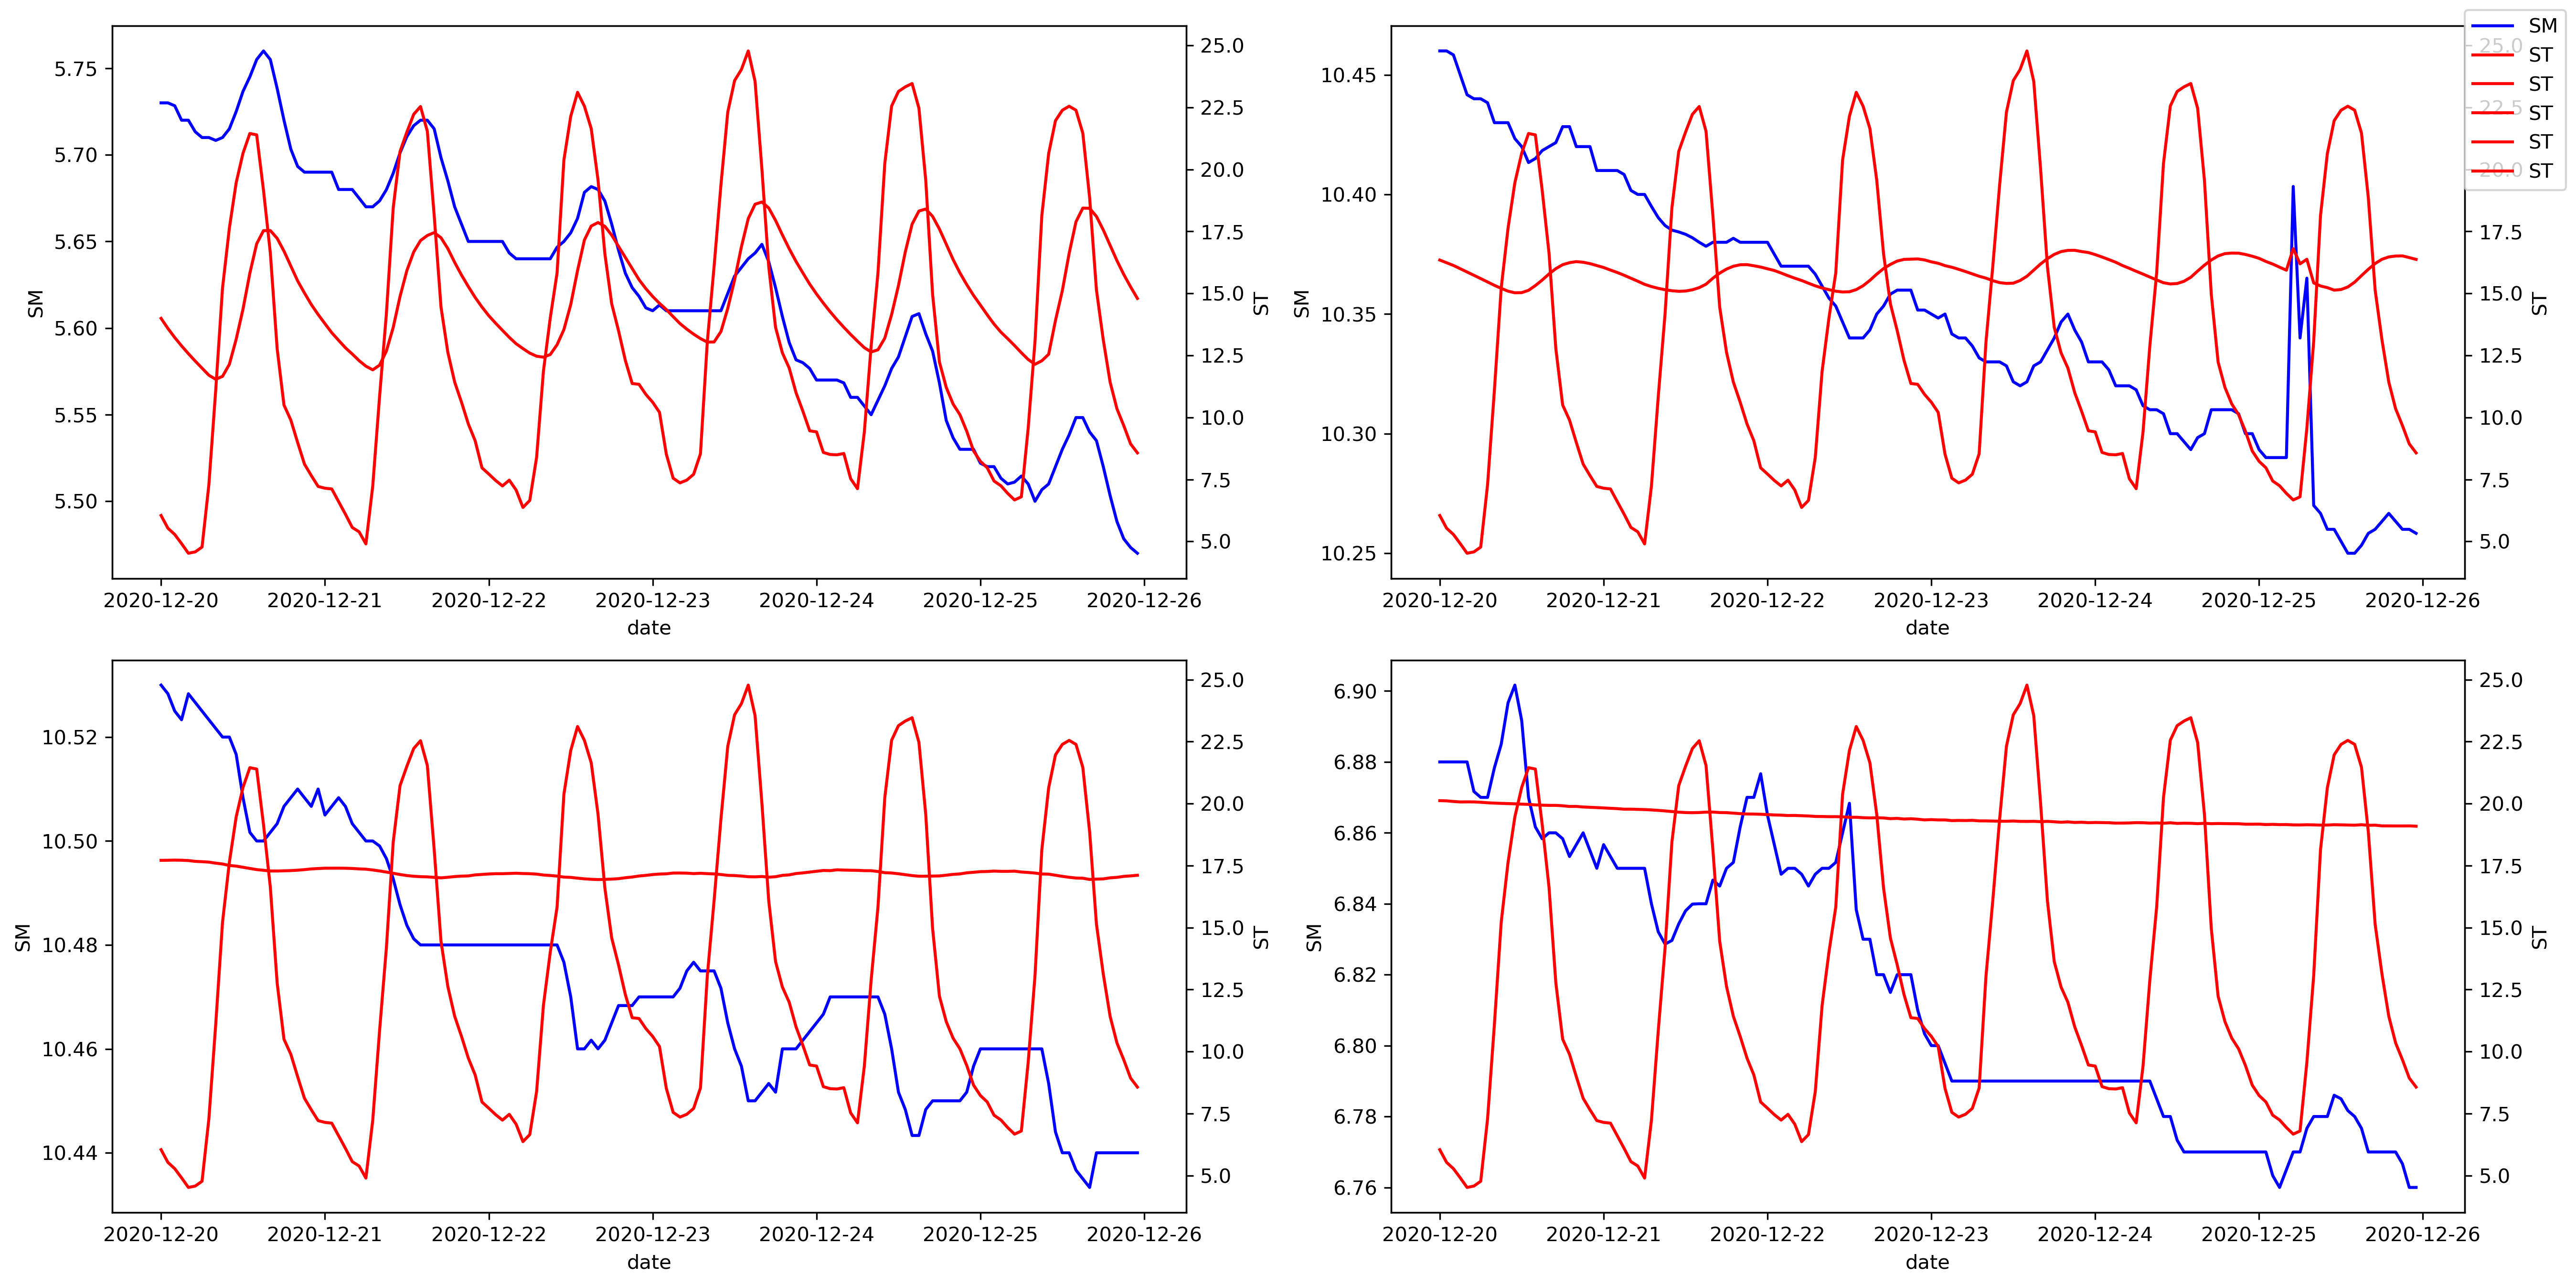

In [94]:
fg, ax = plt.subplots(2, 2, figsize=(9*2, 4*2.25), dpi=300)
ac1 = ax[0,0].twinx()
ax[0,0].plot(SM_sensor1,'b' , label = 'SM')
ax[0,0].set(xlabel = 'date', ylabel = 'SM')
ac1.set(xlabel = 'date', ylabel = 'ST')
ac1.plot(ST_sensor1,'r' , label = 'ST')
ac1.plot(Air_Temp,'r' , label = 'ST')

ac2 = ax[0,1].twinx()
ax[0,1].plot(SM_sensor2,'b')
ax[0,1].set(xlabel = 'date', ylabel = 'SM')
ac2.set(xlabel = 'date', ylabel = 'ST')
ac2.plot(ST_sensor2,'r' )
ac2.plot(Air_Temp,'r' , label = 'ST')

ac3 = ax[1,0].twinx()
ax[1,0].plot(SM_sensor3,'b')
ax[1,0].set(xlabel = 'date', ylabel = 'SM')
ac3.set(xlabel = 'date', ylabel = 'ST')
ac3.plot(ST_sensor3,'r')
ac3.plot(Air_Temp,'r' , label = 'ST')

ac4 = ax[1,1].twinx()
ax[1,1].plot(SM_sensor4,'b')
ax[1,1].set(xlabel = 'date', ylabel = 'SM')
ac4.set(xlabel = 'date', ylabel = 'ST')
ac4.plot(ST_sensor4,'r')
ac4.plot(Air_Temp,'r' , label = 'ST')

# ac5 = ax[2,0].twinx()
# ax[2,0].plot(SM_sensor8,'b')
# ax[2,0].set(xlabel = 'date', ylabel = 'SM')
# ac5.set(xlabel = 'date', ylabel = 'ST')
# ac5.plot(ST_sensor8,'r')
# ac5.plot(Air_Temp,'r' , label = 'ST')

# ac6 = ax[2,1].twinx()
# ax[2,1].plot(SM_sensor9,'b')
# ax[2,1].set(xlabel = 'date', ylabel = 'SM')
# ac6.set(xlabel = 'date', ylabel = 'ST')
# ac6.plot(ST_sensor9,'r' )
# ac6.plot(Air_Temp,'r' , label = 'ST')

plt.tight_layout()
fg.legend();


In [95]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [96]:
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST = ST_sensor1.values
result_S1_ST = adfuller(S1_ST)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-5 Soil Moisture
print('############ Sensor - 2 ############')
S2_ST = ST_sensor2.values
result_S2_ST = adfuller(S2_ST)
print('ADF Statistics: %f' % result_S2_ST[0])
print('p-value: %f' % result_S2_ST[1])
print('Critical Values:')
for key, value in result_S2_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S2_ST[0] < result_S2_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-6 Soil Moisture
print('############ Sensor - 3 ############')
S3_ST = ST_sensor3.values
result_S3_ST = adfuller(S3_ST)
print('ADF Statistics: %f' % result_S3_ST[0])
print('p-value: %f' % result_S3_ST[1])
print('Critical Values:')
for key, value in result_S3_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S3_ST[0] < result_S3_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-7 Soil Moisture
print('############ Sensor - 4 ############')
S4_ST = ST_sensor4.values
result_S4_ST = adfuller(S4_ST)
print('ADF Statistics: %f' % result_S4_ST[0])
print('p-value: %f' % result_S4_ST[1])
print('Critical Values:')
for key, value in result_S4_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S4_ST[0] < result_S4_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-8 Soil Moisture
# print('############ Sensor - 8 ############')
# S8_ST = ST_sensor8.values
# result_S8_ST = adfuller(S8_ST)
# print('ADF Statistics: %f' % result_S8_ST[0])
# print('p-value: %f' % result_S8_ST[1])
# print('Critical Values:')
# for key, value in result_S8_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_ST[0] < result_S8_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-9 Soil Moisture
# print('############ Sensor - 9 ############')
# S9_ST = ST_sensor9.values
# result_S9_ST = adfuller(S9_ST)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -6.402814
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 2 ############
ADF Statistics: -3.809003
p-value: 0.002817
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 3 ############
ADF Statistics: -3.375310
p-value: 0.011830
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 4 ############
ADF Statistics: -5.080059
p-value: 0.000015
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary


In [97]:
print('############ Air Temp. ############')
AT_1 = Air_Temp.values
result_AT = adfuller(AT_1)
print('ADF Statistics: %f' % result_AT[0])
print('p-value: %f' % result_AT[1])
print('Critical Values:')
for key, value in result_AT[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_AT[0] < result_AT[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

############ Air Temp. ############
ADF Statistics: -4.230148
p-value: 0.000586
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary


## Stationarity check after first order differencing

In [98]:
# fig, ax = plt.subplots(2, 1, figsize = (4*2, 4*2.2), dpi = 300)

# ax[0].plot(ST_sensor1, 'blue', label = 'SM before')
# ax[1].plot(S1_ST_Diff, 'b--', label = 'SM after')
# ax[0].set(title='Before Differencing', ylabel = 'soil moisture')
# ax[1].set(title='After Differencing', ylabel = 'soil moisture')
# ax[1].set_xlabel('Time-series')
# plt.tight_layout()
# fig.legend();

-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -8.336471
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 2 ############
ADF Statistics: -6.164279
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 3 ############
ADF Statistics: -6.675159
p-value: 0.000000
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 4 ############
ADF Statistics: -1.716968
p-value: 0.422392
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


<ipython-input-99-428e0af318a3>:123: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


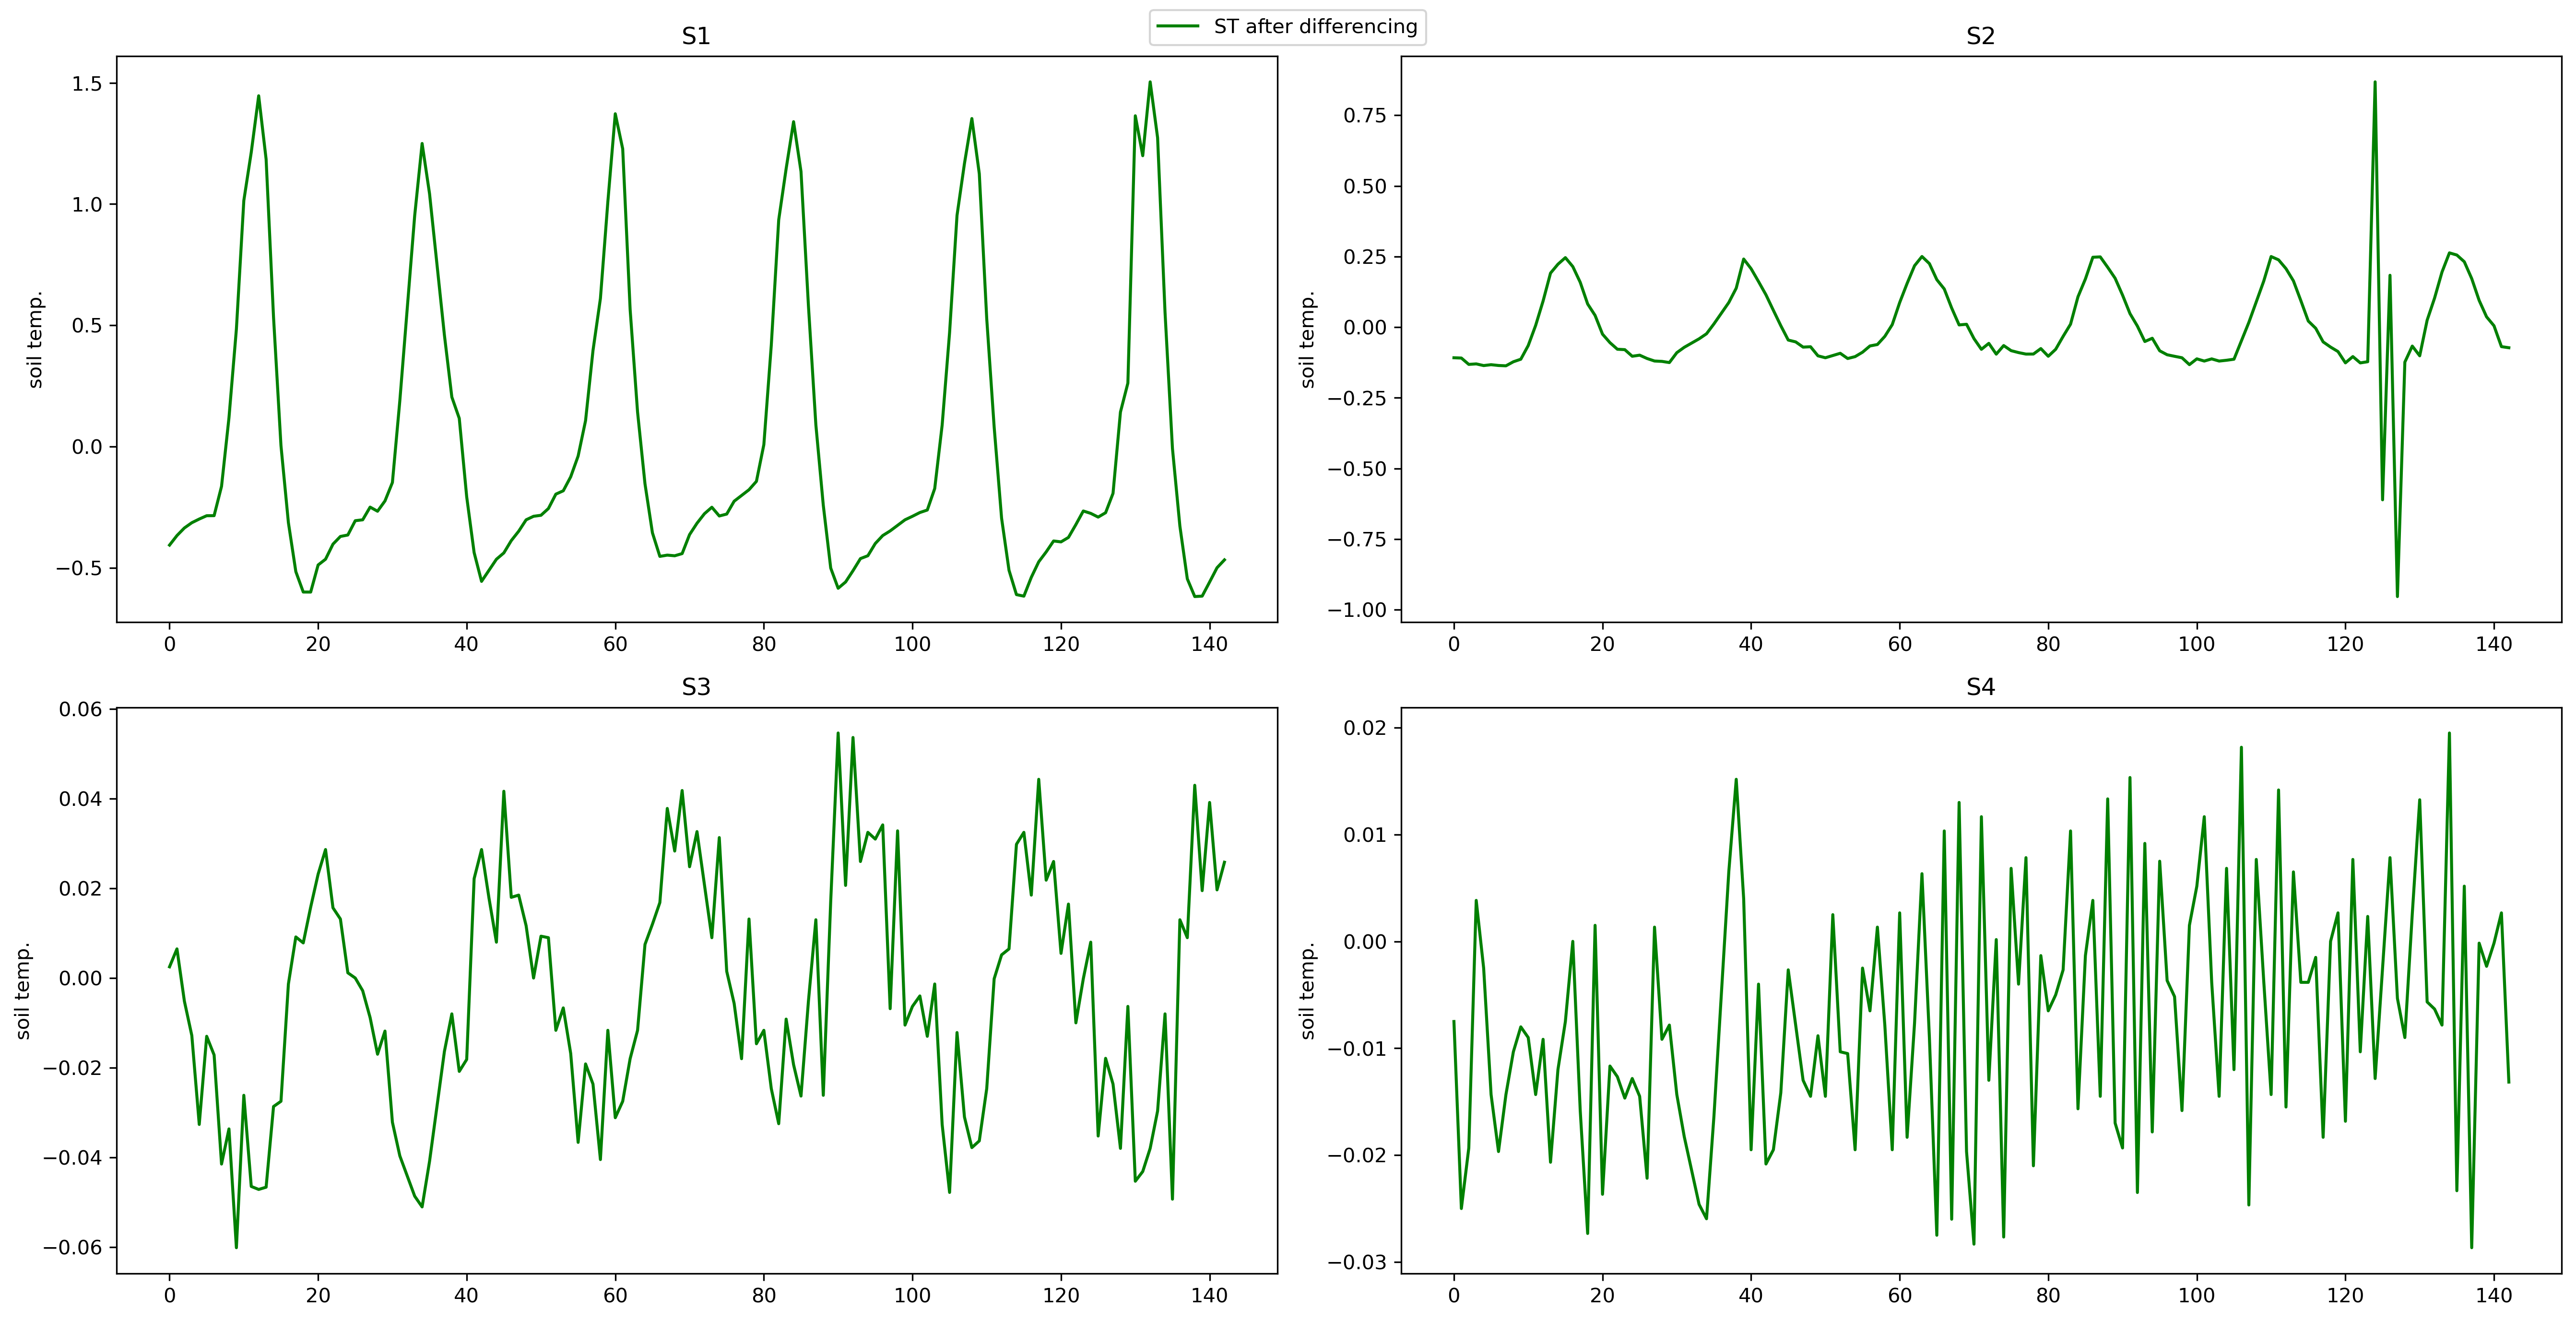

In [99]:
# Differencing to make the Non-stationary time-series into stationaty

# def differncing ():
#     for i in 
print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST_Diff = np.diff(ST_sensor1)
len(S1_ST_Diff)

result_S1_ST = adfuller(S1_ST_Diff)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 2 ############')
S2_ST_Diff = np.diff(ST_sensor2)
# len(S2_ST_Diff)

result_S2_ST = adfuller(S2_ST_Diff)
print('ADF Statistics: %f' % result_S2_ST[0])
print('p-value: %f' % result_S2_ST[1])
print('Critical Values:')
for key, value in result_S2_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S2_ST[0] < result_S2_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 3 ############')
S3_ST_Diff = np.diff(ST_sensor3)
# len(S3_ST_Diff)

result_S3_ST = adfuller(S3_ST_Diff)
print('ADF Statistics: %f' % result_S3_ST[0])
print('p-value: %f' % result_S3_ST[1])
print('Critical Values:')
for key, value in result_S3_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S3_ST[0] < result_S3_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 4 ############')
S4_ST_Diff = np.diff(ST_sensor4)
len(S4_ST_Diff)

result_S4_ST = adfuller(S4_ST_Diff)
print('ADF Statistics: %f' % result_S4_ST[0])
print('p-value: %f' % result_S4_ST[1])
print('Critical Values:')
for key, value in result_S4_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S4_ST[0] < result_S4_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 8 ############')
# S8_ST_Diff = np.diff(ST_sensor8)
# len(S8_ST_Diff)

# result_S8_ST = adfuller(S8_ST_Diff)
# print('ADF Statistics: %f' % result_S8_ST[0])
# print('p-value: %f' % result_S8_ST[1])
# print('Critical Values:')
# for key, value in result_S8_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_ST[0] < result_S8_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 9 ############')
# S9_ST_Diff = np.diff(ST_sensor9)
# len(S9_ST_Diff)

# result_S9_ST = adfuller(S9_ST_Diff)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
fig, ax = plt.subplots(2, 2, figsize = (9*2, 4*2.3), dpi = 300)

ax[0,0].plot(S1_ST_Diff, 'green', label = 'ST after differencing')
ax[0,0].set(title='S1', ylabel = 'soil temp.')

ax[0,1].plot(S2_ST_Diff, 'green')
ax[0,1].set(title='S2', ylabel = 'soil temp.')

ax[1,0].plot(S3_ST_Diff, 'green')
ax[1,0].set(title='S3', ylabel = 'soil temp.')

ax[1,1].plot(S4_ST_Diff, 'green')
ax[1,1].set(title='S4', ylabel = 'soil temp.')

# ax[2,0].plot(S8_ST_Diff, 'green')
# ax[2,0].set(title='S8', ylabel = 'soil temp.')

# ax[2,1].plot(S9_ST_Diff, 'green')
# ax[2,1].set(title='S9', ylabel = 'soil temp.')
fig.legend(loc = 'upper center')
plt.tight_layout()
fig.show()

############ Air Temp ############
ADF Statistics: -10.423588
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary


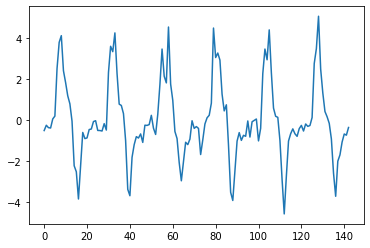

In [100]:
print('############ Air Temp ############')
AT_Diff = np.diff(Air_Temp)
result_AT_2 = adfuller(AT_Diff)
print('ADF Statistics: %f' % result_AT_2[0])
print('p-value: %f' % result_AT_2[1])
print('Critical Values:')
for key, value in result_AT_2[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_AT_2[0] < result_AT_2[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
plt.plot(AT_Diff);

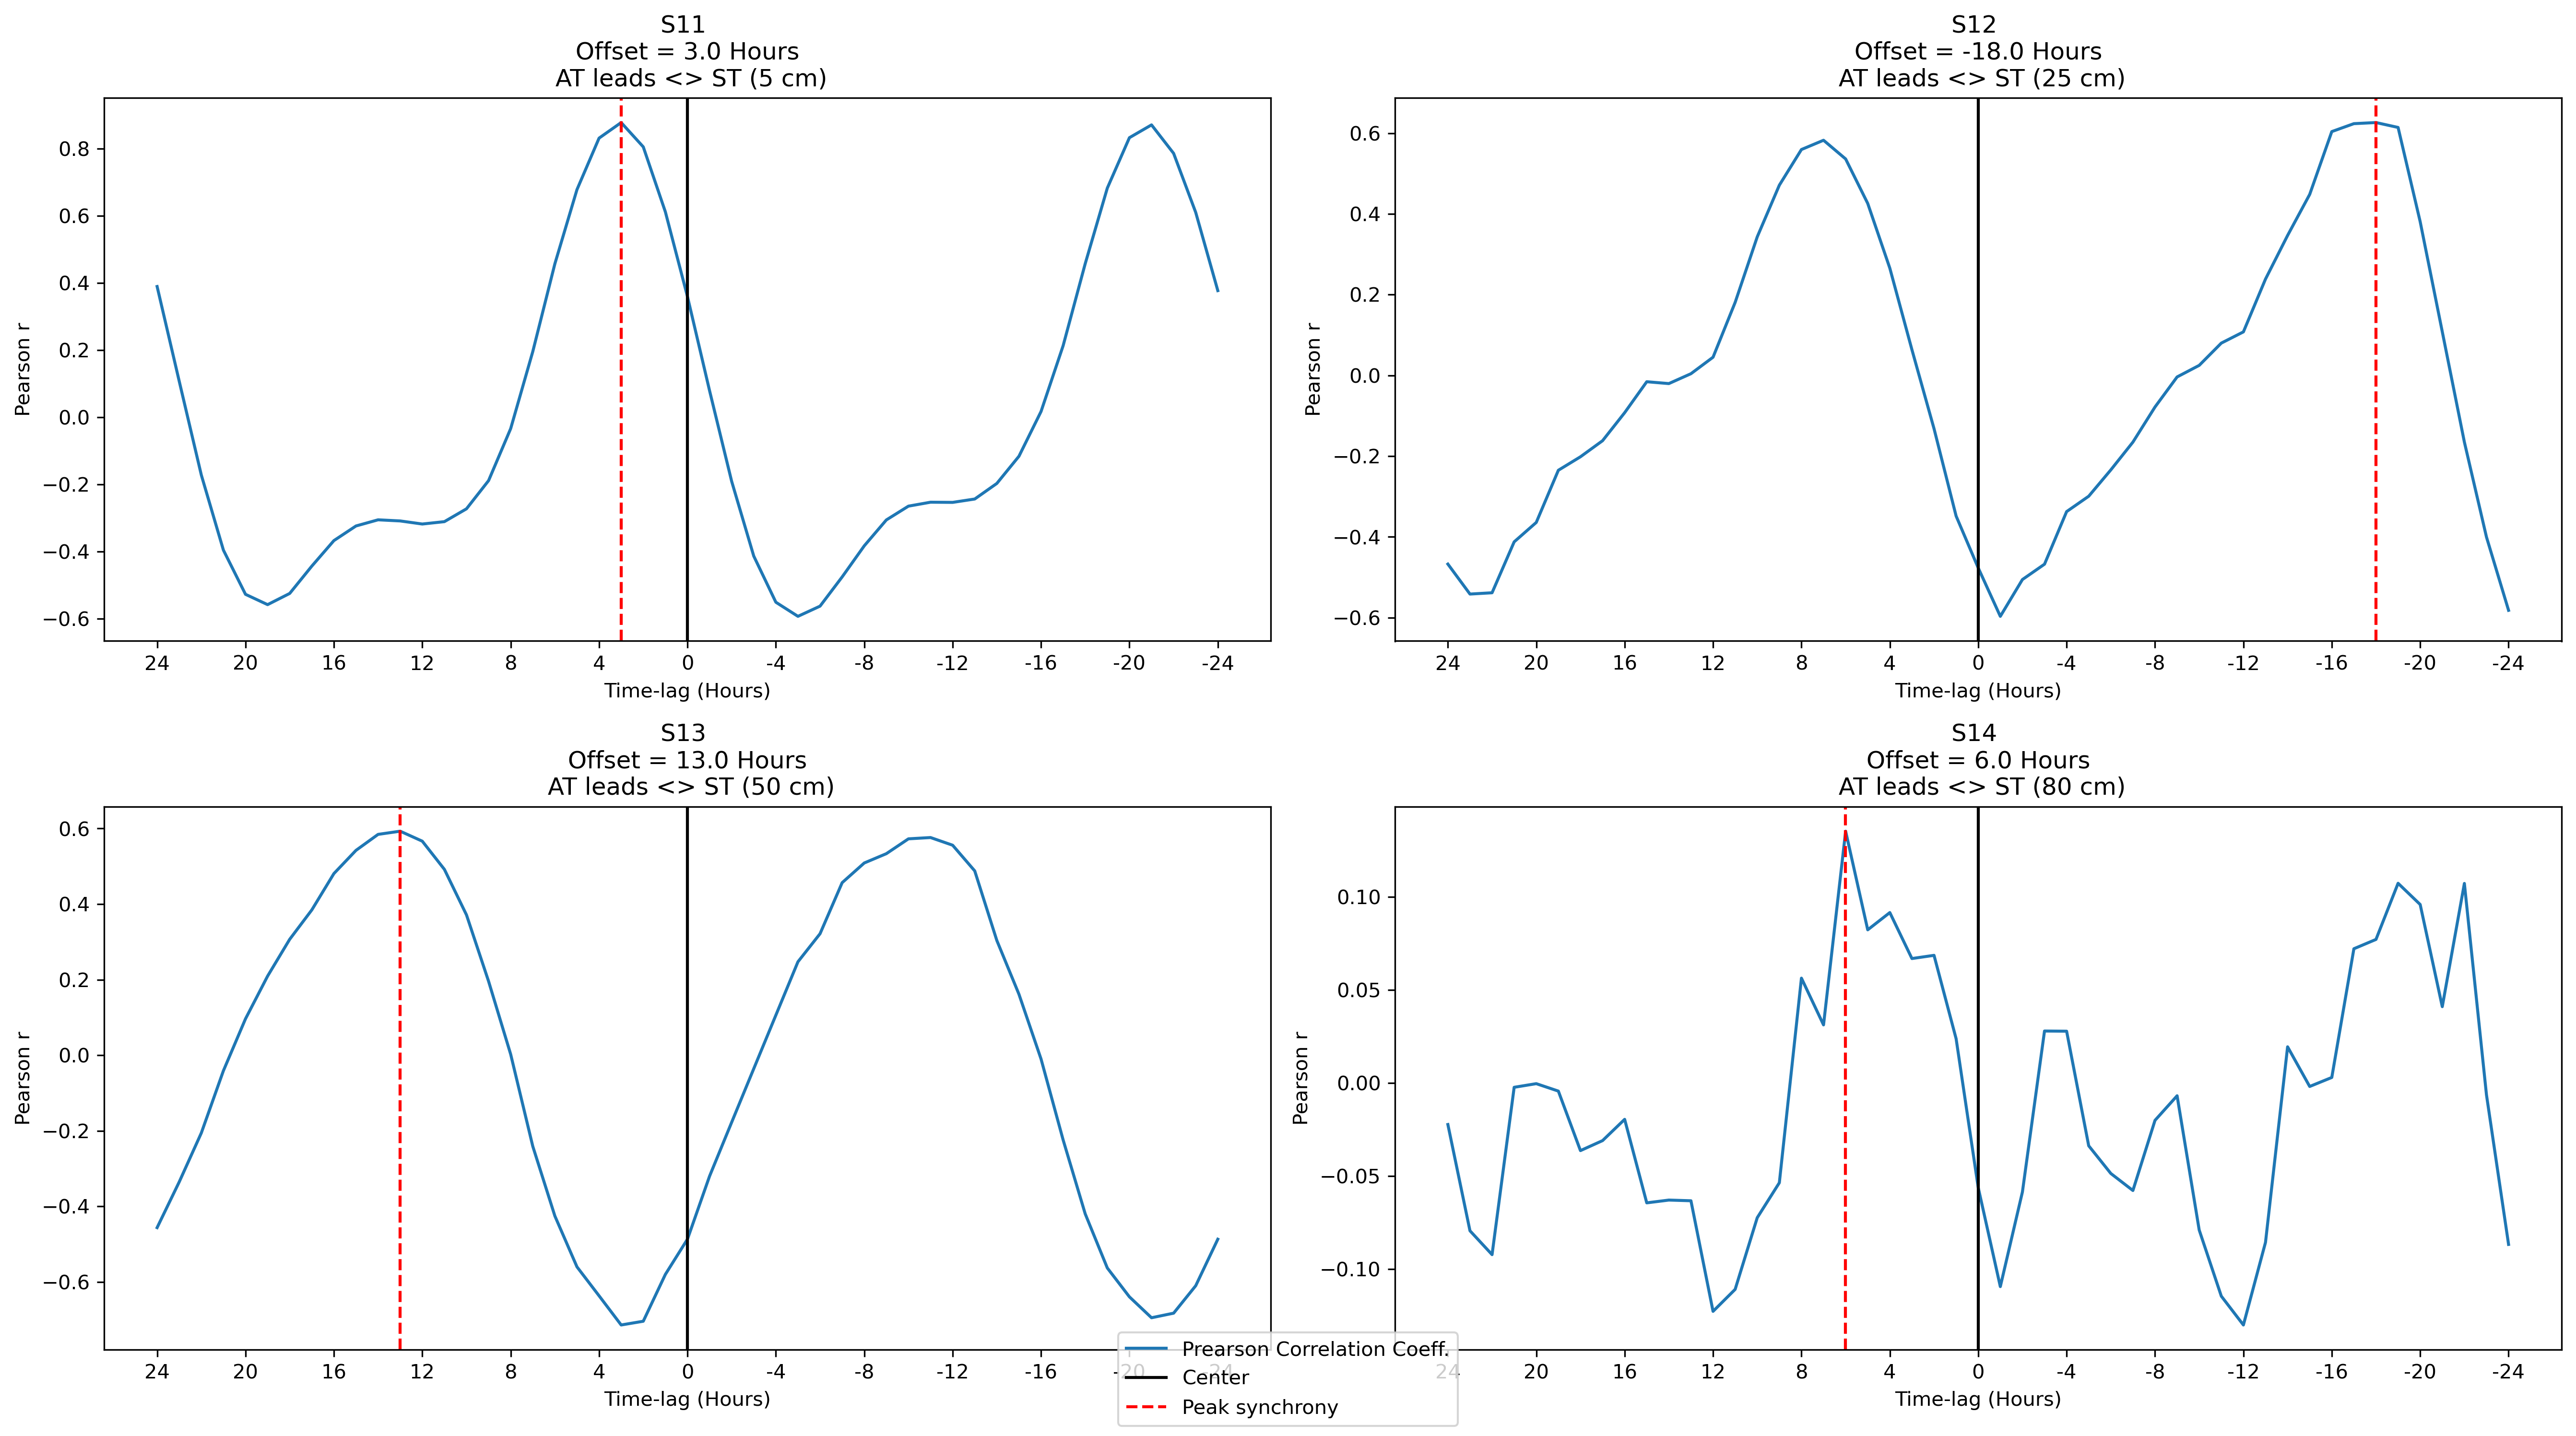

In [101]:
# Time lagged cross correlation

def crosscorr (datax, datay, lag=0, wrap = False):
    """
    Lag-N Cross correlaton.
    Shifted data filled with NaNs
    
    Parameters
    --------
    lag : int, default 0
    dataX, datay : pandas.Series objects of equal length
    
    
    Returns
    --------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))
    

S1_d2 = pd.Series(S1_ST_Diff)
S2_d2 = pd.Series(S2_ST_Diff)
S3_d2 = pd.Series(S3_ST_Diff)
S4_d2 = pd.Series(S4_ST_Diff)
# S8_d2 = pd.Series(S8_ST_Diff)
# S9_d2 = pd.Series(S9_ST_Diff)

# S1_d2 = pd.Series(S1_SM_Diff)
# S5_d2 = pd.Series(S5_SM_Diff)
# S6_d2 = pd.Series(S6_SM_Diff)
# S7_d2 = pd.Series(S7_SM_Diff)
# S8_d2 = pd.Series(S8_SM_Diff)
# S9_d2 = pd.Series(S9_SM_Diff)

AT_d1 = pd.Series(AT_Diff)




S1_rs = [crosscorr(AT_d1, S1_d2, lag) for lag in range(-24, 25)]
S2_rs = [crosscorr(AT_d1, S2_d2, lag) for lag in range(-24, 25)]
S3_rs = [crosscorr(AT_d1, S3_d2, lag) for lag in range(-24, 25)]
S4_rs = [crosscorr(AT_d1, S4_d2, lag) for lag in range(-24, 25)]
# S8_rs = [crosscorr(AT_d1, AT_d2, lag) for lag in range(-24, 25)]
# S9_rs = [crosscorr(AT_d1, AT_d2, lag) for lag in range(-24, 25)]

S1_offset = np.floor(len(S1_rs)/2)-np.argmax(S1_rs)
S2_offset = np.floor(len(S2_rs)/2)-np.argmax(S2_rs)
S3_offset = np.floor(len(S3_rs)/2)-np.argmax(S3_rs)
S4_offset = np.floor(len(S4_rs)/2)-np.argmax(S4_rs)
# S8_offset = np.floor(len(S8_rs)/2)-np.argmax(S8_rs)
# S9_offset = np.floor(len(S9_rs)/2)-np.argmax(S9_rs)

fig, ax = plt.subplots(2,2, figsize = (9*2, 5*2), dpi = 300)
ax[0,0].plot(S1_rs, label = 'Prearson Correlation Coeff.')
ax[0,0].axvline(np.floor(len(S1_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0,0].axvline(np.argmax(S1_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0,0].set(title=f'S11 \n Offset = {S1_offset} Hours \n AT leads <> ST (5 cm)', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[0,1].plot(S2_rs)
ax[0,1].axvline(np.floor(len(S2_rs)/2), color = 'k', linestyle='-')
ax[0,1].axvline(np.argmax(S2_rs), color='r', linestyle='--')
ax[0,1].set(title=f'S12 \n Offset = {S2_offset} Hours \n AT leads <> ST (25 cm)', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,0].plot(S3_rs)
ax[1,0].axvline(np.floor(len(S3_rs)/2), color = 'k', linestyle='-')
ax[1,0].axvline(np.argmax(S3_rs), color='r', linestyle='--')
ax[1,0].set(title=f'S13 \n Offset = {S3_offset} Hours \n AT leads <> ST (50 cm)', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,1].plot(S4_rs)
ax[1,1].axvline(np.floor(len(S4_rs)/2), color = 'k', linestyle='-')
ax[1,1].axvline(np.argmax(S4_rs), color='r', linestyle='--')
ax[1,1].set(title=f'S14 \n Offset = {S4_offset} Hours \n AT leads <> ST (80 cm)', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

plt.tight_layout()
# handles, labels = fig.get_legend_handles_labels()
fig.legend(loc = 'lower center');

In [102]:
# fig, ax = plt.subplots(3,1, figsize = (9, 9), dpi = 300)
# ax[0].plot(S1_rs, label = 'Prearson Correlation Coeff.')
# ax[0].axvline(np.floor(len(S1_rs)/2), color = 'k', linestyle='-', label = 'Center')
# ax[0].axvline(np.argmax(S1_rs), color='r', linestyle='--', label = 'Peak synchrony')
# ax[0].set(title=f'S1 \n Offset = {S1_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)',
#             ylabel = 'Pearson r')
# ax[0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[1].plot(S5_rs)
# ax[1].axvline(np.floor(len(S5_rs)/2), color = 'k', linestyle='-')
# ax[1].axvline(np.argmax(S5_rs), color='r', linestyle='--')
# ax[1].set(title=f'S5 \n Offset = {S5_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[2].plot(S7_rs)
# ax[2].axvline(np.floor(len(S7_rs)/2), color = 'k', linestyle='-')
# ax[2].axvline(np.argmax(S7_rs), color='r', linestyle='--')
# ax[2].set(title=f'S7 \n Offset = {S7_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[2].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[2].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])
# fig.legend(loc = 'upper right')
# plt.tight_layout();
# # handles, labels = fig.get_legend_handles_labels();

In [103]:
print('Maximum r values')
print('Sensor-1 max. rs value:', np.max(S1_rs))
print('Sensor-2 max. rs value:', np.max(S2_rs))
print('Sensor-3 max. rs value:', np.max(S3_rs))
print('Sensor-4 max. rs value:', np.max(S4_rs))
# print('Sensor-8 max. rs value:', np.max(S8_rs))
# print('Sensor-9 max. rs value:', np.max(S9_rs))

# print('\n \n Maximum Time-lag')
# print('Sensor-1 max. rs value:', (np.argmax(S1_rs)) - 24)
# print('Sensor-5 max. rs value:', (np.argmax(S5_rs)) - 24)
# print('Sensor-6 max. rs value:', (np.argmax(S6_rs)) - 24)
# print('Sensor-7 max. rs value:', (np.argmax(S7_rs)) - 24)
# print('Sensor-8 max. rs value:', (np.argmax(S8_rs)) - 24)
# print('Sensor-9 max. rs value:', (np.argmax(S9_rs)) - 24)

Maximum r values
Sensor-1 max. rs value: 0.8773440997771631
Sensor-2 max. rs value: 0.6261599238636831
Sensor-3 max. rs value: 0.5929572989816497
Sensor-4 max. rs value: 0.13528775376120056


In [104]:
# Pre - monsoon
PreMon_S1_rs = S1_rs
PreMon_S2_rs = S2_rs
PreMon_S3_rs = S3_rs
PreMon_S4_rs = S4_rs

# # Monsoon
# Mon_S1_rs = S1_rs
# Mon_S2_rs = S2_rs
# Mon_S3_rs = S3_rs
# Mon_S4_rs = S4_rs

# # Post - monsoon
# PostMon_S1_rs = S1_rs
# PostMon_S2_rs = S2_rs
# PostMon_S3_rs = S3_rs
# PostMon_S4_rs = S4_rs

# # Winter
# Winter_S1_rs = S1_rs
# Winter_S2_rs = S2_rs
# Winter_S3_rs = S3_rs
# Winter_S4_rs = S4_rs



In [105]:
# Pre - monsoon
PreMon_S1_offset = S1_offset
PreMon_S2_offset = S2_offset
PreMon_S3_offset = S3_offset
PreMon_S4_offset = S4_offset

# # Monsoon
# Mon_S1_offset = S1_offset
# Mon_S2_offset = S2_offset
# Mon_S3_offset = S3_offset
# Mon_S4_offset = S4_offset

# # Post - monsoon
# PostMon_S1_offset = S1_offset
# PostMon_S2_offset = S2_offset
# PostMon_S3_offset = S3_offset
# PostMon_S4_offset = S4_offset

# # Winter
# Winter_S1_offset = S1_offset
# Winter_S2_offset = S2_offset
# Winter_S3_offset = S3_offset
# Winter_S4_offset = S4_offset


In [106]:
# fig, ax = plt.subplots(2,2, figsize = (9*2, 5*2), dpi = 300)
# ax[0,0].plot(PreMon_S1_rs, label = 'Prearson Correlation Coeff.')
# ax[0,0].axvline(np.floor(len(PreMon_S1_rs)/2), color = 'k', linestyle='-', label = 'Center')
# ax[0,0].axvline(np.argmax(PreMon_S1S2_rs), color='r', linestyle='--', label = 'Peak synchrony')
# ax[0,0].set(title=f'S1 ~ S2 \n Pre-monsoon \n Offset = {PreMon_S1S2_offset} Hours \n \n ST (5 cm) leads <> AT leads', xlabel = 'Time-lag (Hours)',
#             ylabel = 'Pearson r')
# ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[0,1].plot(Mon_S1_rs)
# ax[0,1].axvline(np.floor(len(Mon_S1_rs)/2), color = 'k', linestyle='-')
# ax[0,1].axvline(np.argmax(Mon_S1_rs), color='r', linestyle='--')
# ax[0,1].set(title=f'S1 ~ S2 \n Monsoon \n Offset = {Mon_S1S2_offset} Hours \n \n ST (5 cm) leads <> AT leads', xlabel = 'Time-lag (Hours)',
#             ylabel = 'Pearson r')
# ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[1,0].plot(PostMon_S1S2_rs)
# ax[1,0].axvline(np.floor(len(PostMon_S1S2_rs)/2), color = 'k', linestyle='-')
# ax[1,0].axvline(np.argmax(PostMon_S1S2_rs), color='r', linestyle='--')
# ax[1,0].set(title=f'S1 ~ S2 \n Post-monsoon \n Offset = {PostMon_S1S2_offset} Hours \n \n ST (5 cm) leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[1,1].plot(Winter_S1S2_rs)
# ax[1,1].axvline(np.floor(len(Winter_S1S2_rs)/2), color = 'k', linestyle='-')
# ax[1,1].axvline(np.argmax(Winter_S1S2_rs), color='r', linestyle='--')
# ax[1,1].set(title=f'S1 ~ S2 \n Winter \n Offset = {Winter_S1S2_offset} Hours \n \n ST (5 cm) leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# plt.tight_layout()
# # handles, labels = fig.get_legend_handles_labels()
# fig.legend(loc = 'center');

In [107]:
# fig, ax = plt.subplots(2,2, figsize = (9*2, 5*2), dpi = 300)
# ax[0,0].plot(PreMon_S1S2_rs, label = 'Prearson Correlation Coeff.')
# ax[0,0].axvline(np.floor(len(PreMon_S1S3_rs)/2), color = 'k', linestyle='-', label = 'Center')
# ax[0,0].axvline(np.argmax(PreMon_S1S3_rs), color='r', linestyle='--', label = 'Peak synchrony')
# ax[0,0].set(title=f'S1 ~ S3 \n Pre-monsoon \n Offset = {PreMon_S1S3_offset} Hours \n AT leads <> ST (25 cm) leads', xlabel = 'Time-lag (Hours)',
#             ylabel = 'Pearson r')
# ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[0,1].plot(Mon_S1S3_rs)
# ax[0,1].axvline(np.floor(len(Mon_S1S3_rs)/2), color = 'k', linestyle='-')
# ax[0,1].axvline(np.argmax(Mon_S1S3_rs), color='r', linestyle='--')
# ax[0,1].set(title=f'S1 ~ S3 \n Monsoon \n Offset = {Mon_S1S3_offset} Hours \n AT leads <> ST (25 cm) leads', xlabel = 'Time-lag (Hours)',
#             ylabel = 'Pearson r')
# ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[1,0].plot(PostMon_S1S3_rs)
# ax[1,0].axvline(np.floor(len(PostMon_S1S3_rs)/2), color = 'k', linestyle='-')
# ax[1,0].axvline(np.argmax(PostMon_S1S3_rs), color='r', linestyle='--')
# ax[1,0].set(title=f'S1 ~ S3 \n Post-monsoon \n Offset = {PostMon_S1S3_offset} Hours \n AT leads <> ST (25 cm) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[1,1].plot(Winter_S1S3_rs)
# ax[1,1].axvline(np.floor(len(Winter_S1S3_rs)/2), color = 'k', linestyle='-')
# ax[1,1].axvline(np.argmax(Winter_S1S3_rs), color='r', linestyle='--')
# ax[1,1].set(title=f'S1 ~ S3 \n Winter \n Offset = {Winter_S1S3_offset} Hours \n AT leads <> ST (25 cm) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# plt.tight_layout()
# # handles, labels = fig.get_legend_handles_labels()
# fig.legend(loc = 'center');

In [108]:
# fig, ax = plt.subplots(2,2, figsize = (9*2, 5*2), dpi = 300)
# ax[0,0].plot(PreMon_S1S4_rs, label = 'Prearson Correlation Coeff.')
# ax[0,0].axvline(np.floor(len(PreMon_S1S4_rs)/2), color = 'k', linestyle='-', label = 'Center')
# ax[0,0].axvline(np.argmax(PreMon_S1S4_rs), color='r', linestyle='--', label = 'Peak synchrony')
# ax[0,0].set(title=f'S1 ~ S4 \n Pre-monsoon \n Offset = {PreMon_S1S4_offset} Hours \n AT leads <> ST (50 cm) leads', xlabel = 'Time-lag (Hours)',
#             ylabel = 'Pearson r')
# ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[0,1].plot(Mon_S1S4_rs)
# ax[0,1].axvline(np.floor(len(Mon_S1S4_rs)/2), color = 'k', linestyle='-')
# ax[0,1].axvline(np.argmax(Mon_S1S4_rs), color='r', linestyle='--')
# ax[0,1].set(title=f'S1 ~ S4 \n Monsoon \n Offset = {Mon_S1S4_offset} Hours \n AT leads <> ST (50 cm) leads', xlabel = 'Time-lag (Hours)',
#             ylabel = 'Pearson r')
# ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[1,0].plot(PostMon_S1S4_rs)
# ax[1,0].axvline(np.floor(len(PostMon_S1S4_rs)/2), color = 'k', linestyle='-')
# ax[1,0].axvline(np.argmax(PostMon_S1S4_rs), color='r', linestyle='--')
# ax[1,0].set(title=f'S1 ~ S4 \n Post-monsoon \n Offset = {PostMon_S1S4_offset} Hours \n AT leads <> ST (50 cm) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[1,1].plot(Winter_S1S4_rs)
# ax[1,1].axvline(np.floor(len(Winter_S1S4_rs)/2), color = 'k', linestyle='-')
# ax[1,1].axvline(np.argmax(Winter_S1S4_rs), color='r', linestyle='--')
# ax[1,1].set(title=f'S1 ~ S4 \n Winter \n Offset = {Winter_S1S4_offset} Hours \n AT leads <> ST (50 cm) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# plt.tight_layout()
# # handles, labels = fig.get_legend_handles_labels()
# fig.legend(loc = 'center');